In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
from scipy.stats import zscore, mannwhitneyu

nsub = 90

PCI_S_all = np.zeros((nsub,301))
PCI_W_all = np.zeros((nsub,301))
PCI_C_all = np.zeros((nsub,301))
PCI_MCS_all = np.zeros((nsub,301))
PCI_UWS_all = np.zeros((nsub,301))

iterate= np.arange(0,nsub,1)
ind_binJ_W=999+10+np.arange(301)
ind_binJ_2=1199+10+np.arange(301)

time = np.arange(-1000,1001,1)
time2 = np.arange(-1200,1201,1)
time= time[ind_binJ_W]
time2= time2[ind_binJ_2]

for i,t in enumerate(iterate):
    sub = i+1
    path = 'data2\PCI\PCI_C_%s.mat'%sub;
    PCI_C_val = loadmat(path)['PCI'];
    
    path = 'data2\PCI\PCI_MCS_%s.mat'%sub;
    PCI_MCS_val = loadmat(path)['PCI'];
    
    path = 'data2\PCI\PCI_UWS_%s.mat'%sub;
    PCI_UWS_val = loadmat(path)['PCI'];
    
    path = 'data1\PCI_def\PCI_S_%s.mat'%sub;
    PCI_S_val = loadmat(path)['PCI'];
    
    path = 'data1\PCI_def\PCI_W_%s.mat'%sub;
    PCI_W_val = loadmat(path)['PCI'];

    PCI_MCS_all[i,:] = PCI_MCS_val;
    PCI_UWS_all[i,:] = PCI_UWS_val;
    PCI_C_all[i,:] = PCI_C_val;

    PCI_S_all[i,:] = PCI_S_val;
    PCI_W_all[i,:] = PCI_W_val;


In [71]:
#Remove the outliers
S_list = []
W_list = []
C_list=[]
MCS_list = []
UWS_list = []
iterate= np.arange(0,301,1)
for i,t in enumerate(iterate):
    MCS = np.delete(PCI_MCS_all[:,i], np.where(abs(zscore(PCI_MCS_all[:,i])) > 3))
    MCS_list.append(list(MCS))
    
    UWS = np.delete(PCI_UWS_all[:,i], np.where(abs(zscore(PCI_UWS_all[:,i])) > 3))
    UWS_list.append(list(UWS))
    
    C = np.delete(PCI_C_all[:,i], np.where(abs(zscore(PCI_C_all[:,i])) > 3))
    C_list.append(list(C))
    
    S = np.delete(PCI_S_all[:,i], np.where(abs(zscore(PCI_S_all[:,i])) > 3))
    S_list.append(list(S))
    
    W = np.delete(PCI_W_all[:,i], np.where(abs(zscore(PCI_W_all[:,i])) > 3))
    W_list.append(list(W))

In [72]:
PCI_MCS_mean = np.zeros(301)
PCI_UWS_mean = np.zeros(301)
PCI_C_mean = np.zeros(301)
PCI_S_mean = np.zeros(301)
PCI_W_mean = np.zeros(301)
for i,t in enumerate(MCS_list):
    PCI_C_mean[i] = np.median(C_list[i])
    PCI_MCS_mean[i] = np.median(MCS_list[i])
    PCI_UWS_mean[i] = np.median(UWS_list[i])
    PCI_S_mean[i] = np.median(S_list[i])
    PCI_W_mean[i] = np.median(W_list[i])

# DataSet 1: Wake & Sleep NREM 3

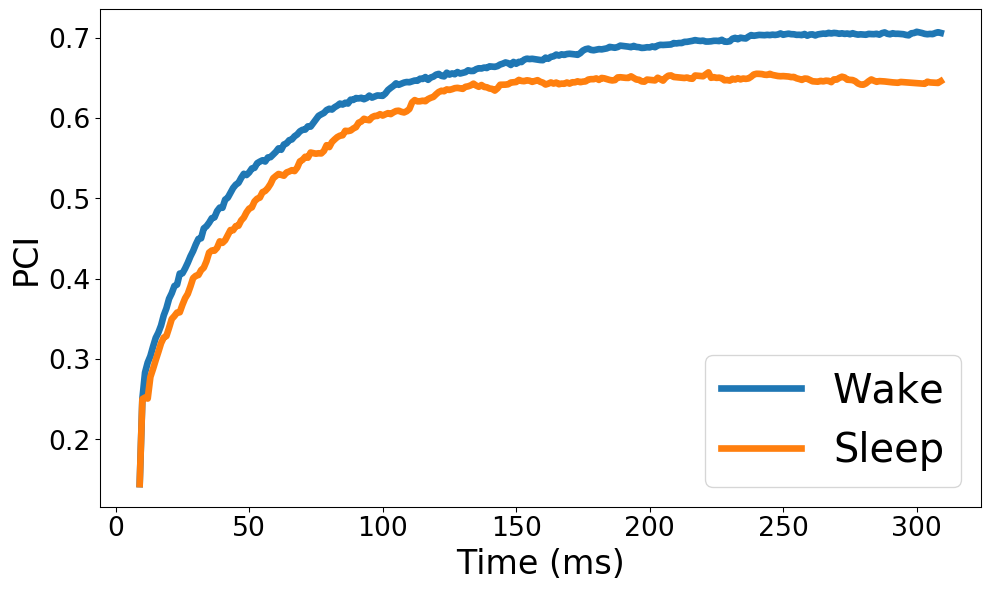

In [73]:
hfont = {'fontname':'Helvetica'}
my_dpi= 96

#plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)

axs.plot(time,PCI_W_mean, ls='solid',label = 'Wake',linewidth=5)
axs.plot(time,PCI_S_mean, ls='solid',label = 'Sleep',linewidth=5)
axs.set_xlabel('Time (ms)',fontsize=25)
axs.tick_params(axis="x", labelsize=20)
axs.set_ylabel('PCI',fontsize=25)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
axs.legend(loc='best',prop={'size': 30})

fig.tight_layout()

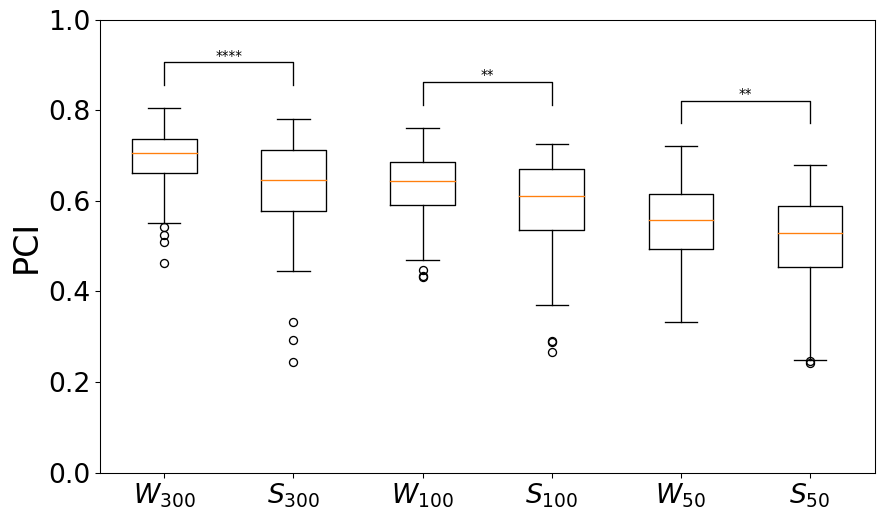

<Figure size 432x288 with 0 Axes>

In [76]:
box_plots=[W_list[-1],S_list[-1],W_list[-200],S_list[-200],W_list[-250],S_list[-250]]
fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)
axs.boxplot(box_plots) #We construct a boxplot
axs.set_xticklabels(['$W_{300}$', '$S_{300}$','$W_{100}$', '$S_{100}$','$W_{50}$', '$S_{50}$']) #We put the x-labels
axs.set_ylabel('PCI',fontsize=25) #y-axis label
axs.tick_params(axis="x", labelsize=20)
axs.tick_params(axis="y", labelsize=20)

x1, x2 = 1, 2 
y, h, col = max(W_list[-1]) + 0.05,0.05, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
axs.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x1, x2 = 3, 4 
y, h, col = max(W_list[-200]) + 0.05,0.05, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
axs.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

x1, x2 = 5, 6 
y, h, col = max(W_list[-250]) + 0.05,0.05, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
axs.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

axs.set_ylim(0,1)

plt.show()
plt.tight_layout()

In [77]:
t,p_val = mannwhitneyu(W_list[-1],S_list[-1])
t,p_val2 = mannwhitneyu(W_list[-200],S_list[-200])
t,p_val3 = mannwhitneyu(W_list[-250],S_list[-250])
print(p_val)
print(p_val2)
print(p_val3)

2.246880870517814e-05
0.0037362267612939364
0.006567108061478525


# DataSet 2: C, UWS & MCS

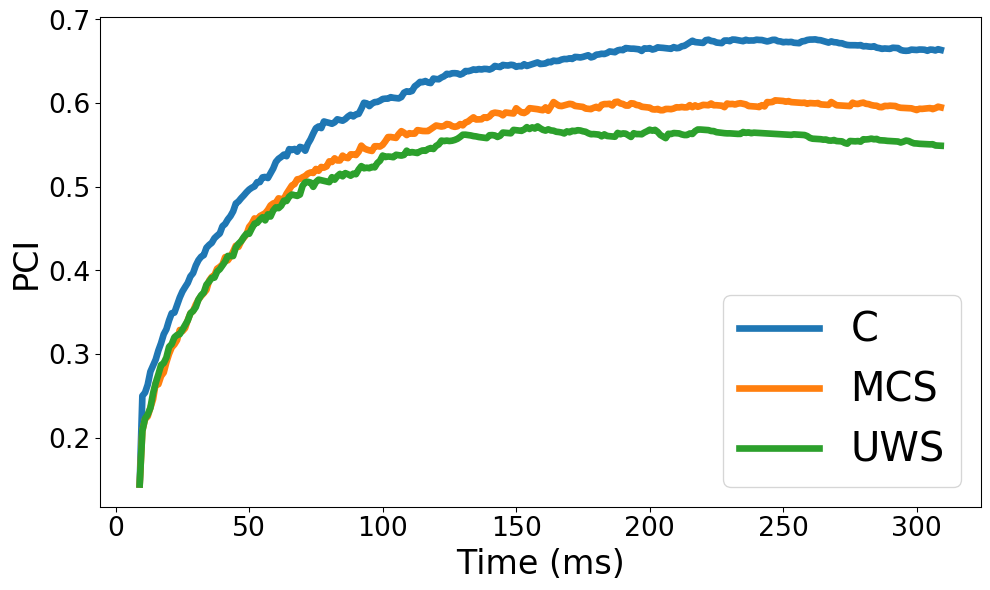

In [78]:
hfont = {'fontname':'Helvetica'}
my_dpi= 96

fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)

axs.plot(time2,PCI_C_mean, label = 'C',linewidth=5)
axs.plot(time2,PCI_MCS_mean, label = 'MCS',linewidth=5)
axs.plot(time2,PCI_UWS_mean, label = 'UWS',linewidth=5)
axs.set_xlabel('Time (ms)',fontsize=25)
axs.tick_params(axis="x", labelsize=20)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
axs.set_ylabel('PCI',fontsize=25)
axs.legend(loc='best',prop={'size': 30})

#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()

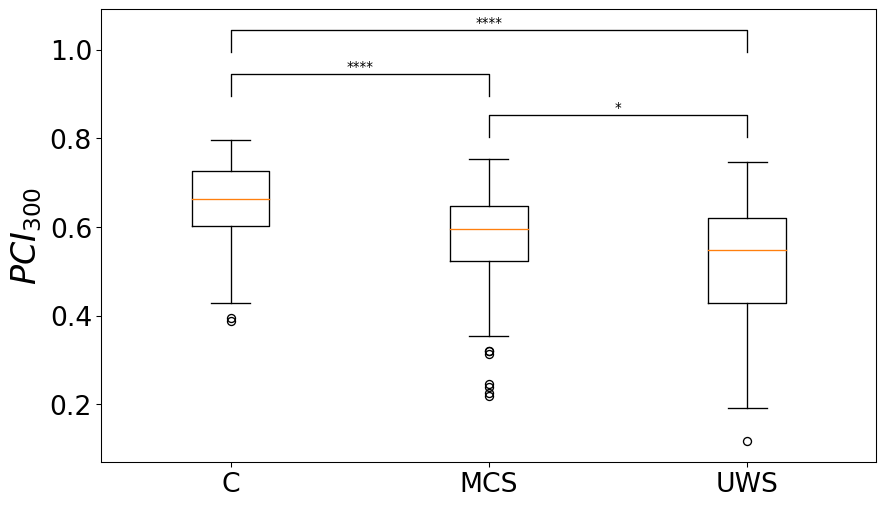

<Figure size 432x288 with 0 Axes>

In [79]:
box_plots=[C_list[-1],MCS_list[-1],UWS_list[-1]]
fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)
axs.boxplot(box_plots) #We construct a boxplot
axs.set_xticklabels(['C', 'MCS','UWS']) #We put the x-labels
axs.set_ylabel('$PCI_{300}$',fontsize=25) #y-axis label
axs.tick_params(axis="x", labelsize=20)
axs.tick_params(axis="y", labelsize=20)

x1, x2 = 1, 2 
y, h, col = max(C_list[-1]) + 0.1,0.05, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
axs.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x1, x2 = 1, 3 
y, h, col = max(C_list[-1]) + 0.2,0.05, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
axs.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x1, x2 = 2, 3 
y, h, col = max(MCS_list[-1]) + 0.05,0.05, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
axs.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

#axs.set_ylim(0,1)

plt.show()
plt.tight_layout()

In [80]:
t,p_val = mannwhitneyu(C_list[-1],MCS_list[-1])
t,p_val2 = mannwhitneyu(MCS_list[-1],UWS_list[-1])
t,p_val3 = mannwhitneyu(UWS_list[-1],C_list[-1])
print(p_val)
print(p_val2)
print(p_val3)

5.529877131347625e-07
0.005143970771616358
6.838848719467926e-12
